# Quick start tutorial on photometry pipeline

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import astropy
import matplotlib.pylab as plt
%matplotlib inline

# Adding the library
import sys
#sys.path.remove('/Users/gks/Dropbox/mypylib')
sys.path.append("../src/")
import fitsimg
from photpipeline import PhotoMetryImage, PhotoMetryPipeLine

## Read in filenames

In [2]:
import glob
basefolder = "/Users/Sophie/Desktop/0_CLEAN/first200/"
regex = "*.fits"
filenames = glob.glob(basefolder + regex)

# Example of reading one frame with PhotoMetryImage

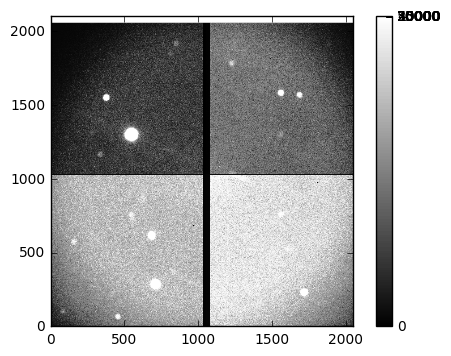

In [3]:
PMI = PhotoMetryImage(filenames[0])
PMI.plot()

### Plotting aperture locations

#### Step 1: Getting the initial X and Y positions of the target and reference stars.
Go to AIJ and only look at the first frame in the dataset using the DataProcessor.

#### Step 2: Save the datatable and overview image
This can be found under "data/" for the first image in the test sequence

#### Step 3: Load the dataframe

In [4]:
df_pos = pd.read_csv("../data/Processed_science_2x2_binning_sdssi_fast_diff_measurements.xls",sep="\t")
df_pos=df_pos[0:200]

In [5]:
# Get the x and y array positions for the target and the reference stars
# Idea: Change this into a function ?
NUMREFSTARS = 5
stars = ["T1"] + ["C"+str(i+2) for i in range(NUMREFSTARS)]
xx = df_pos[["X(FITS)_"+star for star in stars]].ix[0].values
yy = df_pos[["Y(FITS)_"+star for star in stars]].ix[0].values

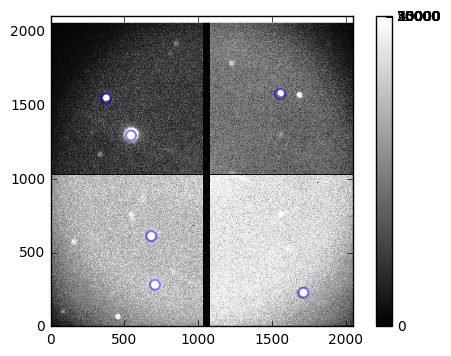

In [6]:
# Perform photometry on one image and plot the apertures
df_photometry_one_image = PMI.perform_photometry_window_centroid(xcen=xx,ycen=yy)
PMI.plot_apertures()

In [ ]:
df_photometry_one_image

,Label,JD_UTC,JD_SOBS,AIRMASS,TELAZ,TELALT,TELROT,X(FITS)_T1,Y(FITS)_T1,Sky/Pixel_T1,...,Source-Sky_C6,Peak_C6,tot_C_cnts,rel_flux_T1,rel_flux_C2,rel_flux_C3,rel_flux_C4,rel_flux_C5,rel_flux_C6,Saturated
1,science_2x2_binning_sdssi_fast_diff.0188.fits,2.457864e+06,2.457864e+06,1.600165,58.09275,58.09275,-18.325643,544.224715,1294.752822,746.444884,...,243927.027567,1001.0,4.630419e+06,9.589813,0.033167,0.0824,0.734831,0.096923,0.052679,0.0


# Running PhotoMetryPipeLine

### Start pipeline

In [ ]:
PMPL = PhotoMetryPipeLine(filenames,xcenters=xx,ycenters=yy,r_aper=50.,r_annulus1=58.,r_annulus2=87.);
# Run the pipeline
df_results = PMPL.run_pipeline(remove_cosmics=False);

Analyzing file # 0 science_2x2_binning_sdssi_fast_diff.0188.fits with r= 50.0 58.0 87.0
Analyzing file # 1 science_2x2_binning_sdssi_fast_diff.0189.fits with r= 50.0 58.0 87.0
Analyzing file # 2 science_2x2_binning_sdssi_fast_diff.0190.fits with r= 50.0 58.0 87.0
Analyzing file # 3 science_2x2_binning_sdssi_fast_diff.0191.fits with r= 50.0 58.0 87.0
Analyzing file # 4 science_2x2_binning_sdssi_fast_diff.0192.fits with r= 50.0 58.0 87.0
Analyzing file # 5 science_2x2_binning_sdssi_fast_diff.0193.fits with r= 50.0 58.0 87.0
Analyzing file # 6 science_2x2_binning_sdssi_fast_diff.0194.fits with r= 50.0 58.0 87.0
Analyzing file # 7 science_2x2_binning_sdssi_fast_diff.0195.fits with r= 50.0 58.0 87.0
Analyzing file # 8 science_2x2_binning_sdssi_fast_diff.0196.fits with r= 50.0 58.0 87.0
Analyzing file # 9 science_2x2_binning_sdssi_fast_diff.0197.fits with r= 50.0 58.0 87.0
Analyzing file # 10 science_2x2_binning_sdssi_fast_diff.0198.fits with r= 50.0 58.0 87.0
Analyzing file # 11 science_2x2

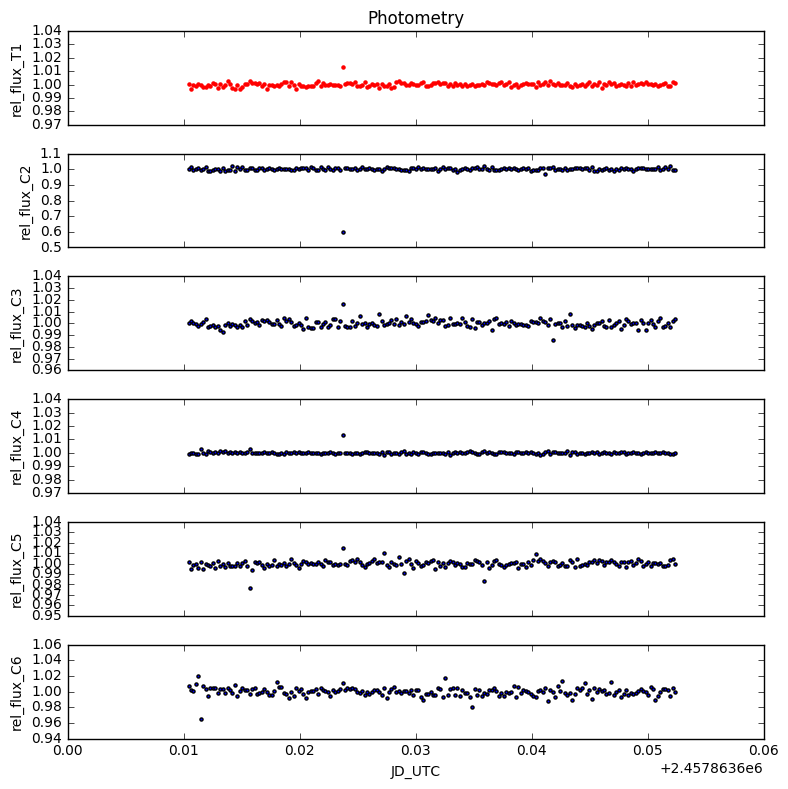

In [10]:
#Plot the relative flux of the target star and the ref stars from Pipeline
PMPL.plot_photometry()
plt.savefig('./photometry_rel_flux.png',format='png')

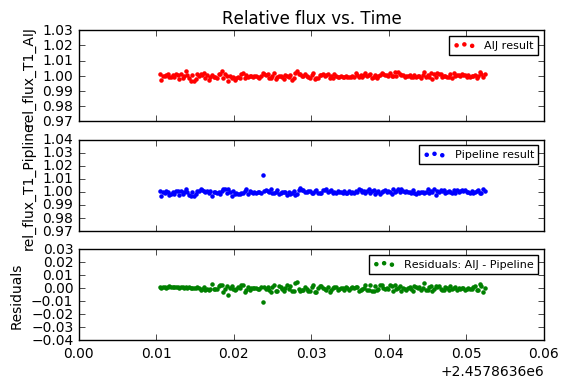

In [11]:
#Plot the relative flux from Pipeline and AIJ for the target star
PMPL.rel_flux_residuals()

In [ ]:
#plot X and Y centroids
PMPL.plot_X_and_Y()

In [10]:
# Save as a csv file
PMPL.save_photometry()

Saved file to: phot_results_50.0_58.0_87.0.csv


In [22]:
# df_results is in the same format as AIJ to make it easier to analyze it in AIJ
df_results

# Features to add
#### Reduction: 
1. Create master flat
2. Create master dark
3. Create master bias

#### General photometry
- Make functions to cycle through / pick reference stars
- Add errorbars
- Add scintillation calculation
- Finish implementing cosmic ray rejection
- Add Howell centroiding

#### Plotting and diagnostic plots
- Plot the relative photometry with errorbars
- Plot the "Source-Sky" for the target star and all of the reference stars in a multi panel
— Plot X centroid and Y centroid for all of the

TODO:
- Take a closer look at other cool pipelines:
-- https://github.com/TGBeatty/MINERVAphot/blob/master/MINERVAphot.py
-- https://github.com/bmorris3/wasp85_q1_2017

